In [1]:

# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create dummy data and classifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# key metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# roc and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# f score 
from sklearn.metrics import f1_score
import seaborn as sns

data = pd.read_csv('perth_au_house_prices.csv') # load the data

data

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [2]:
data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [3]:
data.shape

(33656, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [5]:
#check missing values
data.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [6]:
#procentage of null values in "GARAGE" column
(data["GARAGE"].isna().sum()/len(data["GARAGE"]))*100

7.362728785357738

In [7]:
#procentage of null values in "BUILD_YEAR" column
(data["BUILD_YEAR"].isna().sum()/len(data["BUILD_YEAR"]))*100

9.374257190396957

In [8]:
#procentage of null values in "NEAREST_SCH_RANK" column
(data["NEAREST_SCH_RANK"].isna().sum()/len(data["NEAREST_SCH_RANK"]))*100

32.54100309008795

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


In [10]:
# replacing missing values in "GARAGE" column with mean of that column
data['GARAGE'] = data['GARAGE'].fillna(data['GARAGE'].mean())

In [11]:
# replacing missing values in "BUILD_YEAR" column with mean of that column
data['BUILD_YEAR'] = data['BUILD_YEAR'].fillna(data['BUILD_YEAR'].mean())

In [21]:
df=pd.get_dummies(data, columns=['SUBURB'],drop_first=True)
print(df)

                  ADDRESS    PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  \
0           1 Acorn Place   565000         4          2     2.0        600   
1             1 Addis Way   365000         3          2     2.0        351   
2         1 Ainsley Court   287000         3          1     1.0        719   
3         1 Albert Street   255000         2          1     2.0        651   
4            1 Aman Place   325000         4          1     2.0        466   
...                   ...      ...       ...        ...     ...        ...   
33651      9C Gold Street  1040000         4          3     2.0        292   
33652      9C Pycombe Way   410000         3          2     2.0        228   
33653      9D Pycombe Way   427000         3          2     2.0        261   
33654     9D Shalford Way   295000         3          1     2.0        457   
33655  9E Margaret Street   295000         3          1     2.0        296   

       FLOOR_AREA   BUILD_YEAR  CBD_DIST               NEAREST_

In [13]:
df["DATE_SOLD"] = pd.to_datetime(df["DATE_SOLD"])
df["DATE_YEAR"] = df["DATE_SOLD"].dt.year
df["DATE_MONTH"] = df["DATE_SOLD"].dt.month
df.head()

,ADDRESS,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,...,SUBURB_Woodbridge,SUBURB_Woodlands,SUBURB_Woodvale,SUBURB_Wooroloo,SUBURB_Wungong,SUBURB_Yanchep,SUBURB_Yangebup,SUBURB_Yokine,DATE_YEAR,DATE_MONTH
0,1 Acorn Place,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,...,0,0,0,0,0,0,0,0,2018,9
1,1 Addis Way,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,...,0,0,0,0,0,0,0,0,2019,2
2,1 Ainsley Court,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,...,0,0,0,0,0,0,0,0,2015,6
3,1 Albert Street,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,...,0,0,0,0,0,0,0,0,2018,7
4,1 Aman Place,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,...,0,0,0,0,0,0,0,0,2016,11


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Columns: 338 entries, ADDRESS to SUBURB_Yokine
dtypes: float64(6), int64(8), object(4), uint8(320)
memory usage: 14.9+ MB


In [23]:
{column: df[column].nunique() for column in df.select_dtypes("object")}

{'ADDRESS': 33566, 'NEAREST_STN': 68, 'DATE_SOLD': 350, 'NEAREST_SCH': 160}

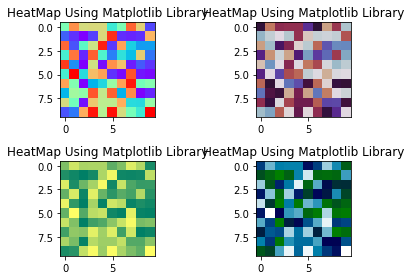

In [24]:
df= np.random.random((10,10))

plt.subplot(2,2,1)
plt.imshow( df, interpolation = 'nearest',cmap="rainbow")
plt.title('HeatMap Using Matplotlib Library')

plt.subplot(2,2,2)
plt.imshow( df, interpolation = 'nearest',cmap="twilight")
plt.title('HeatMap Using Matplotlib Library')

plt.subplot(2,2,3)
plt.imshow( df, interpolation = 'nearest',cmap="summer")
plt.title('HeatMap Using Matplotlib Library')

plt.subplot(2,2,4)
plt.imshow( df, interpolation = 'nearest',cmap="ocean")
plt.title('HeatMap Using Matplotlib Library')

plt.tight_layout()

plt.show()

In [25]:
corr_matrix = df.corr()
print(corr_matrix['PRICE'].sort_values(ascending=False))


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [31]:
new_df = df.drop(['ADDRESS', 'NEAREST_STN', 'NEAREST_SCH', 'DATE_SOLD'], axis=1)
new_df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [28]:
new_df.info()

NameError: name 'new_df' is not defined

In [29]:
new_df.isnull().values.any()

NameError: name 'new_df' is not defined

In [30]:
new_df.isnull().sum().sum()

NameError: name 'new_df' is not defined

In [ ]:
DF = pd.DataFrame(new_df)
DF = new_df.replace(np.nan,0)

DF.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,...,SUBURB_Woodbridge,SUBURB_Woodlands,SUBURB_Woodvale,SUBURB_Wooroloo,SUBURB_Wungong,SUBURB_Yanchep,SUBURB_Yangebup,SUBURB_Yokine,DATE_YEAR,DATE_MONTH
0,565000,4,2,2.0,600,160,2003.0,18300,1800,6164,...,0,0,0,0,0,0,0,0,2018,9
1,365000,3,2,2.0,351,139,2013.0,26900,4900,6167,...,0,0,0,0,0,0,0,0,2019,2
2,287000,3,1,1.0,719,86,1979.0,22600,1900,6111,...,0,0,0,0,0,0,0,0,2015,6
3,255000,2,1,2.0,651,59,1953.0,17900,3600,6056,...,0,0,0,0,0,0,0,0,2018,7
4,325000,4,1,2.0,466,131,1998.0,11200,2000,6054,...,0,0,0,0,0,0,0,0,2016,11


In [ ]:
DF.isnull().sum().sum()

0

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [19]:
X = DF.drop('PRICE', axis=1)
y = DF['PRICE']

NameError: name 'DF' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridg

# Linear Regression 

lr = LinearRegression().fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print(lr_score)

0.770333222604957


In [ ]:
ridge = Ridge(alpha=15).fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
print(ridge_score)